
From an interesting reference: [Pokemon with stats](https://www.kaggle.com/abcsds/pokemon/data) dataset and the [matplotlib radar chart sample](https://matplotlib.org/examples/api/radar_chart.html), I implemented this simple method to create radar charts for all facilities in Hong Kong (except country_park which has no data about admin district). Through this method, it is very clear to see the distribution of each type of facility in each district of Hong Kong. As it is hard to run ArcPy on this platform, I did not include any functions related to ArcPy but just packages for ploting radar charts. All functions (using ArcPy) related to produce the following csv file from raw data  are shown on my GitHub website... (it will be public after end of 2018 sem2)

* The following is the whole content of radarchart.py available on my GitHub website and you can just apply it to your dataset but please pay attention to the format of your input file. 
* More detailed example will be demonstrated after this python file.

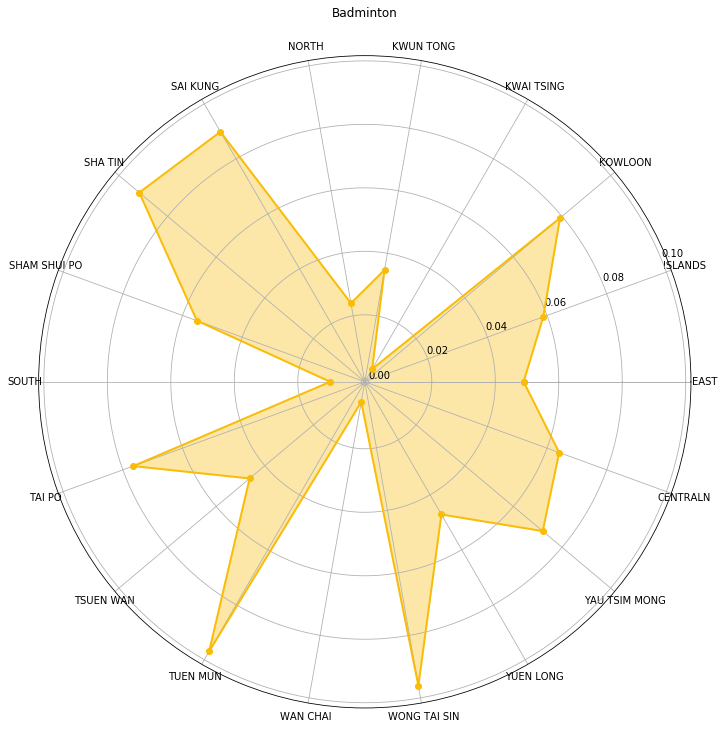

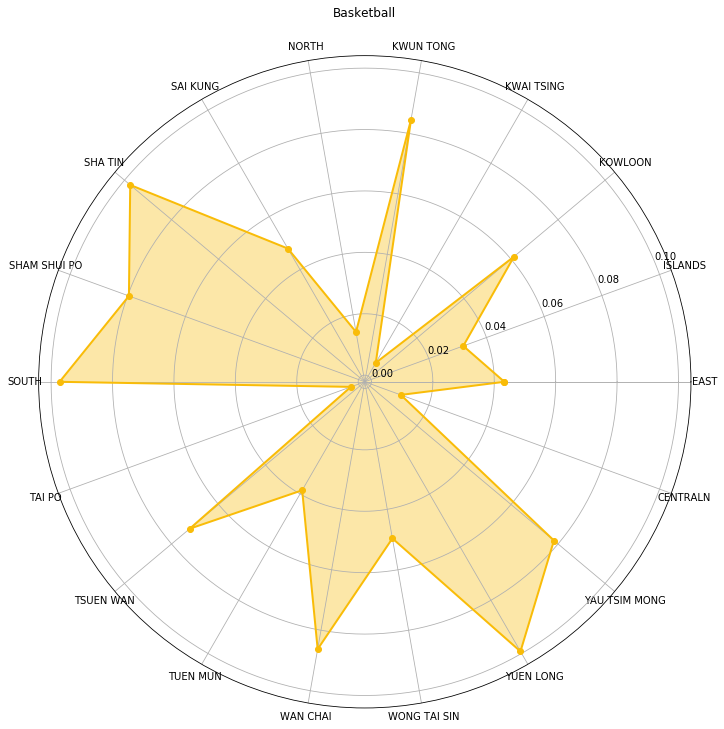

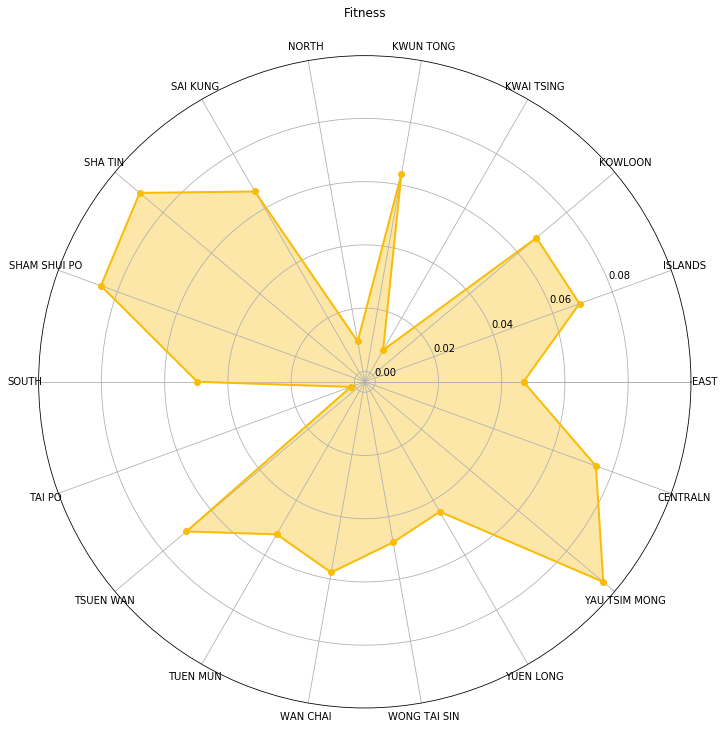

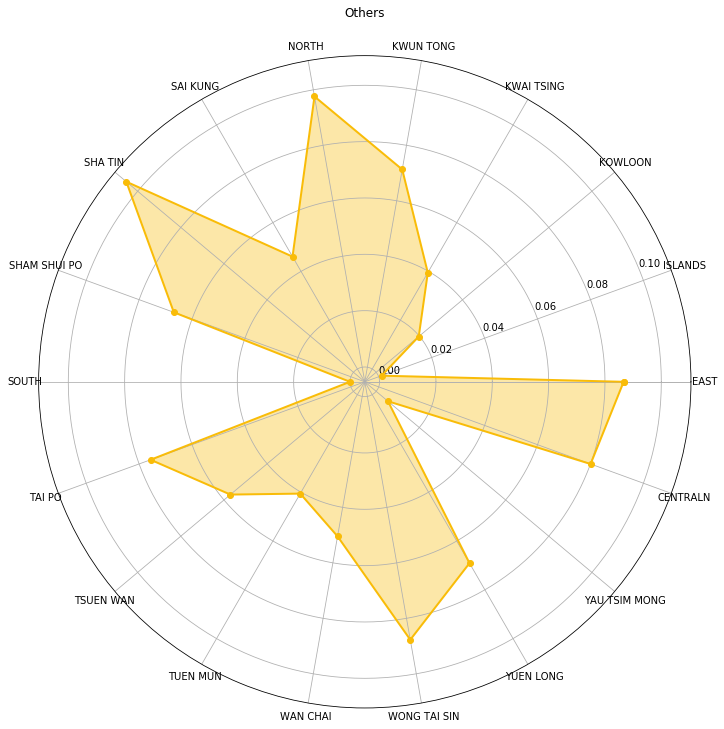

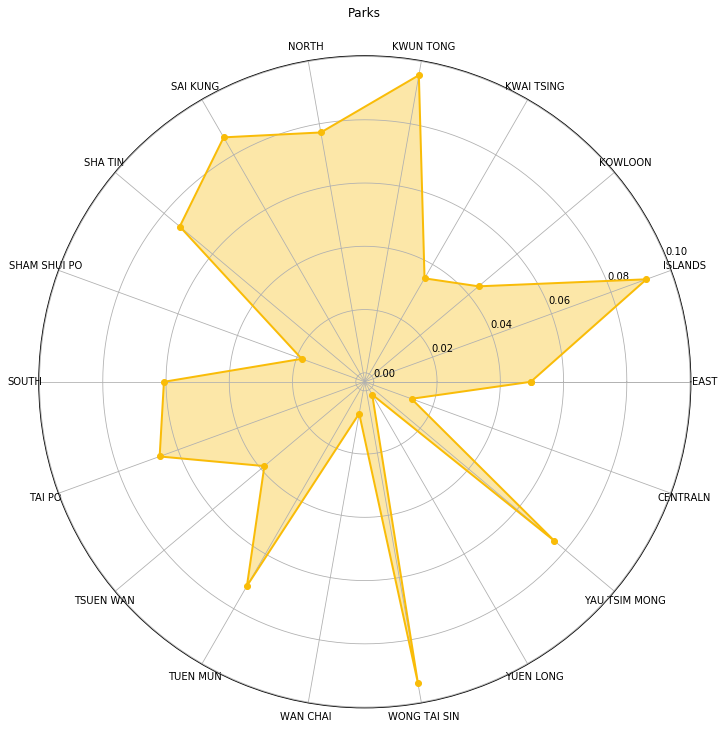

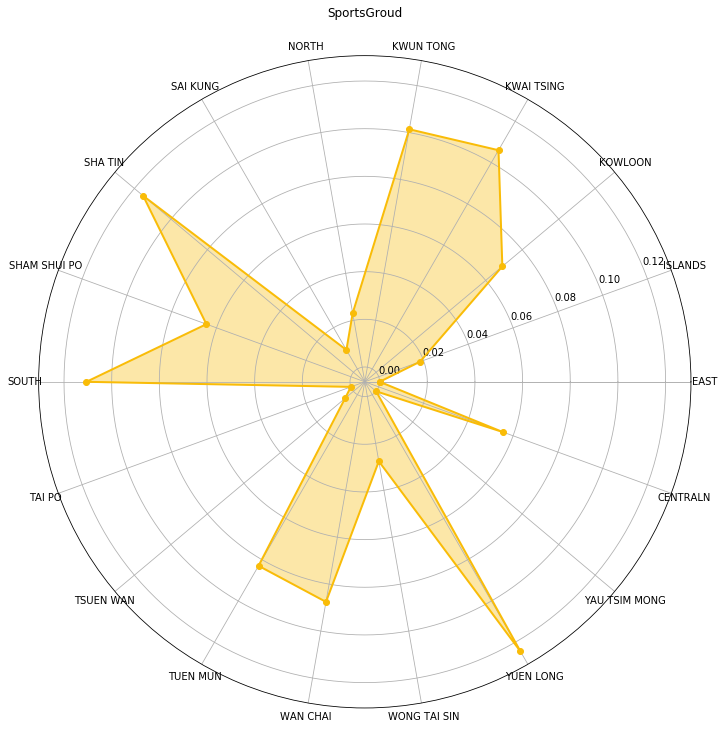

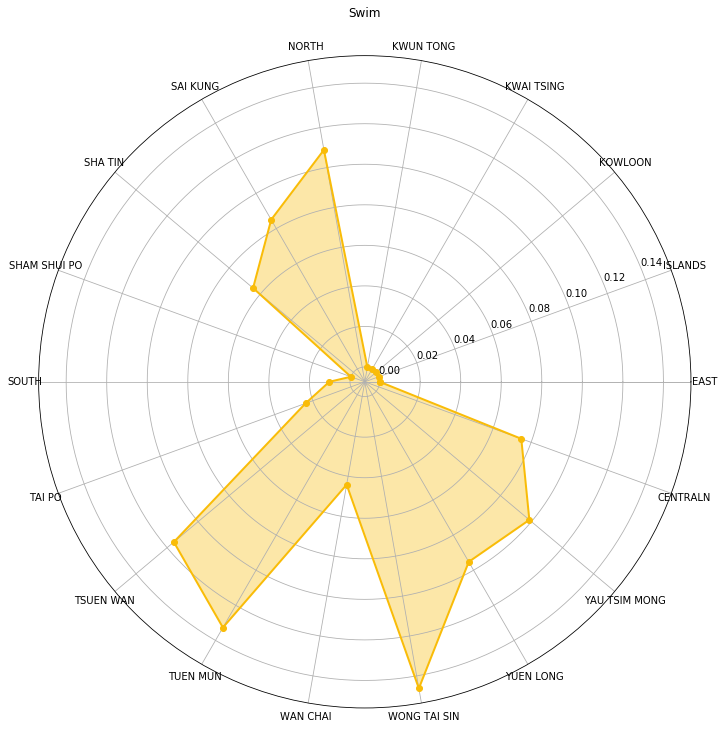

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def radar_chart(n_chart, file_path, sum_col,labels): # convert csv to radar_charts

	'''
	n_chart = number of radar_charts
	file_path =location of csv file
	sum_col = the name of a column containing sum of each row
	lables = labels of each column
	for example:
		labels=np.array( ['EAST', 'ISLANDS',
               'KOWLOON', 'KWAI TSING',
               'KWUN TONG', 'NORTH',
               'SAI KUNG', 'SHA TIN',
               'SHAM SHUI PO', 'SOUTH',
               'TAI PO', 'TSUEN WAN',
               'TUEN MUN', 'WAN CHAI',
               'WONG TAI SIN', 'YUEN LONG',
               'YAU TSIM MONG', 'CENTRALN']) # All districts' names
	
	'''
	df=pd.read_csv(file_path, error_bad_lines=False)
	df=pd.DataFrame(df)
	df_new = df.iloc[:,1:-1].div(df[sum_col], axis=0)
	df.iloc[:,1:-1]=df_new
	
	labels = np.array(labels)
	for i in range(n_chart):
		stats=df.iloc[i,1:-1].values
		title=df.iloc[i,0]
		angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
		
		stats=np.concatenate((stats,[stats[0]]))
		angles=np.concatenate((angles,[angles[0]]))
		# colors=['#f9bc08','#8f8ce7','#fd4659','#dc4d01','#6ba353','#c4a661','#7bc8f6']///////////////
		# color=colors[i]
		color = '#f9bc08'
		fig=plt.figure()
		fig.set_size_inches(12, 12)
		ax = fig.add_subplot(111, polar=True)
		lines=ax.plot(angles, stats, 'o-', linewidth=2)
		plt.setp(lines, color=color, linewidth=2.0)
		ax.fill(angles, stats, color,alpha=0.35)
		ax.set_thetagrids(angles * 180/np.pi, labels)
		ax.title.set_text(title)
		ax.grid(True)
		plt.savefig(title+'.png')
		
if __name__ == '__main__':
    n_chart=7
    file_path = "../input/radarset/radar_fac.csv"
    sum_col="SUM"
    labels=['EAST', 'ISLANDS',
               'KOWLOON', 'KWAI TSING',
               'KWUN TONG', 'NORTH',
               'SAI KUNG', 'SHA TIN',
               'SHAM SHUI PO', 'SOUTH',
               'TAI PO', 'TSUEN WAN',
               'TUEN MUN', 'WAN CHAI',
               'WONG TAI SIN', 'YUEN LONG',
               'YAU TSIM MONG', 'CENTRALN']
    radar_chart(n_chart, file_path, sum_col,labels)

# Preparation 

As usual, load the libraries and data. Then use the `df.head()` to view the structure of the dataset.

In [104]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv("../input/radarset/radar_fac.csv", error_bad_lines=False)
df.head(7)

,name,CENTRAL & WESTERN,EASTERN,ISLANDS,KOWLOON CITY,KWAI TSING,KWUN TONG,NORTH,SAI KUNG,SHA TIN,SHAM SHUI PO,SOUTHERN,TAI PO,TSUEN WAN,TUEN MUN,WAN CHAI,WONG TAI SIN,YAU TSIM MONG,YUEN LONG,SUM
0,Badminton,55,66,89,4,39,27,101,103,62,11,86,52,109,6,108,53,81,72,1124
1,Basketball,130,96,184,15,254,43,144,293,239,292,8,217,116,259,149,298,235,31,3003
2,Fitness,34,50,49,6,46,7,48,65,62,36,1,51,38,42,35,32,69,54,725
3,Others,79,1,18,36,65,89,42,96,61,0,69,52,37,46,80,63,5,73,912
4,Parks,27,50,24,19,52,42,47,40,10,33,36,21,39,4,51,1,41,7,544
5,SportsGroud,0,4,15,23,22,5,2,25,14,24,0,1,18,19,6,27,0,12,217
6,Swim,0,0,0,0,0,32,25,19,0,3,7,34,39,13,43,28,29,22,294


In [105]:
df=pd.DataFrame(df)
df.dtypes # check data type

name                  object
CENTRAL & WESTERN      int64
EASTERN                int64
ISLANDS                int64
KOWLOON CITY           int64
KWAI TSING             int64
KWUN TONG              int64
NORTH                  int64
SAI KUNG               int64
SHA TIN                int64
SHAM SHUI PO           int64
SOUTHERN               int64
TAI PO                 int64
TSUEN WAN              int64
TUEN MUN               int64
WAN CHAI               int64
WONG TAI SIN           int64
YAU TSIM MONG          int64
YUEN LONG              int64
SUM                    int64
dtype: object

In [106]:
df_new = df.iloc[:,1:-1].div(df["SUM"], axis=0)
df_new # standardize values for radar chart

,CENTRAL & WESTERN,EASTERN,ISLANDS,KOWLOON CITY,KWAI TSING,KWUN TONG,NORTH,SAI KUNG,SHA TIN,SHAM SHUI PO,SOUTHERN,TAI PO,TSUEN WAN,TUEN MUN,WAN CHAI,WONG TAI SIN,YAU TSIM MONG,YUEN LONG
0,0.048932,0.058719,0.079181,0.003559,0.034698,0.024021,0.089858,0.091637,0.055160,0.009786,0.076512,0.046263,0.096975,0.005338,0.096085,0.047153,0.072064,0.064057
1,0.043290,0.031968,0.061272,0.004995,0.084582,0.014319,0.047952,0.097569,0.079587,0.097236,0.002664,0.072261,0.038628,0.086247,0.049617,0.099234,0.078255,0.010323
2,0.046897,0.068966,0.067586,0.008276,0.063448,0.009655,0.066207,0.089655,0.085517,0.049655,0.001379,0.070345,0.052414,0.057931,0.048276,0.044138,0.095172,0.074483
3,0.086623,0.001096,0.019737,0.039474,0.071272,0.097588,0.046053,0.105263,0.066886,0.000000,0.075658,0.057018,0.040570,0.050439,0.087719,0.069079,0.005482,0.080044
4,0.049632,0.091912,0.044118,0.034926,0.095588,0.077206,0.086397,0.073529,0.018382,0.060662,0.066176,0.038603,0.071691,0.007353,0.093750,0.001838,0.075368,0.012868
5,0.000000,0.018433,0.069124,0.105991,0.101382,0.023041,0.009217,0.115207,0.064516,0.110599,0.000000,0.004608,0.082949,0.087558,0.027650,0.124424,0.000000,0.055300
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.108844,0.085034,0.064626,0.000000,0.010204,0.023810,0.115646,0.132653,0.044218,0.146259,0.095238,0.098639,0.074830


In [107]:
df.iloc[:,1:-1]=df_new
df

,name,CENTRAL & WESTERN,EASTERN,ISLANDS,KOWLOON CITY,KWAI TSING,KWUN TONG,NORTH,SAI KUNG,SHA TIN,SHAM SHUI PO,SOUTHERN,TAI PO,TSUEN WAN,TUEN MUN,WAN CHAI,WONG TAI SIN,YAU TSIM MONG,YUEN LONG,SUM
0,Badminton,0.048932,0.058719,0.079181,0.003559,0.034698,0.024021,0.089858,0.091637,0.055160,0.009786,0.076512,0.046263,0.096975,0.005338,0.096085,0.047153,0.072064,0.064057,1124
1,Basketball,0.043290,0.031968,0.061272,0.004995,0.084582,0.014319,0.047952,0.097569,0.079587,0.097236,0.002664,0.072261,0.038628,0.086247,0.049617,0.099234,0.078255,0.010323,3003
2,Fitness,0.046897,0.068966,0.067586,0.008276,0.063448,0.009655,0.066207,0.089655,0.085517,0.049655,0.001379,0.070345,0.052414,0.057931,0.048276,0.044138,0.095172,0.074483,725
3,Others,0.086623,0.001096,0.019737,0.039474,0.071272,0.097588,0.046053,0.105263,0.066886,0.000000,0.075658,0.057018,0.040570,0.050439,0.087719,0.069079,0.005482,0.080044,912
4,Parks,0.049632,0.091912,0.044118,0.034926,0.095588,0.077206,0.086397,0.073529,0.018382,0.060662,0.066176,0.038603,0.071691,0.007353,0.093750,0.001838,0.075368,0.012868,544
5,SportsGroud,0.000000,0.018433,0.069124,0.105991,0.101382,0.023041,0.009217,0.115207,0.064516,0.110599,0.000000,0.004608,0.082949,0.087558,0.027650,0.124424,0.000000,0.055300,217
6,Swim,0.000000,0.000000,0.000000,0.000000,0.000000,0.108844,0.085034,0.064626,0.000000,0.010204,0.023810,0.115646,0.132653,0.044218,0.146259,0.095238,0.098639,0.074830,294


# Draw the Radar Chart

After we know our dataset, it's time to draw the radar now. We want to show all district names as different axes on our radar chart, so just take them out and set as a `np.array`. Here we use the facility, basketball court,  as an example to illustrate the chart. 

In [108]:
labels=np.array( ['EAST', 'ISLANDS',
               'KOWLOON', 'KWAI TSING',
               'KWUN TONG', 'NORTH',
               'SAI KUNG', 'SHA TIN',
               'SHAM SHUI PO', 'SOUTH',
               'TAI PO', 'TSUEN WAN',
               'TUEN MUN', 'WAN CHAI',
               'WONG TAI SIN', 'YUEN LONG',
               'YAU TSIM MONG', 'CENTRALN']) # All districts' names
stats=df.iloc[1,1:-1].values
title=df.iloc[1,0]
title

'Basketball'

Set the angle of polar axis. And here we need to use the `np.concatenate` to draw a closed plot in radar chart. 

In [109]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

Here we should use the `fig.add_subplot` rather than the `sns.plt.subplots()`.(notice the "s"). Because the `subplots` doesn't contain the argument "polar". We can only set the polar axis by `subplot`.  

Then draw the plot as the frame and fill in the surrounded area by `fill()`. At the end set the label of axis and the title then everything done. Here you go ;)

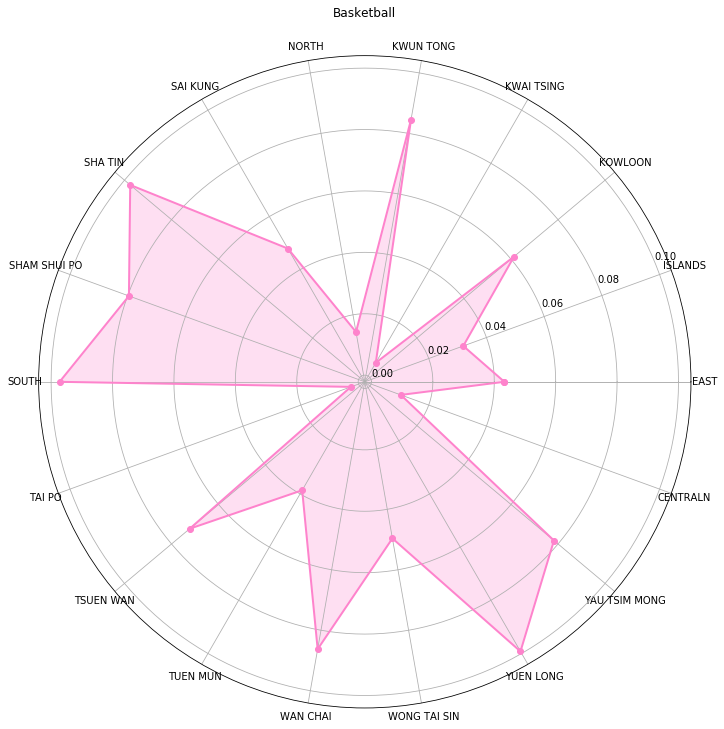

In [110]:
color='#fe83cc'
fig=plt.figure()
fig.set_size_inches(12, 12)
ax = fig.add_subplot(111, polar=True)
lines=ax.plot(angles, stats, 'o-', linewidth=2)
plt.setp(lines, color=color, linewidth=2.0)
ax.fill(angles, stats, color,alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.title.set_text("Basketball")
ax.grid(True)
fig.savefig('basketball.png')

Now it is time to draw all radar charts and let's fill them with different colors!

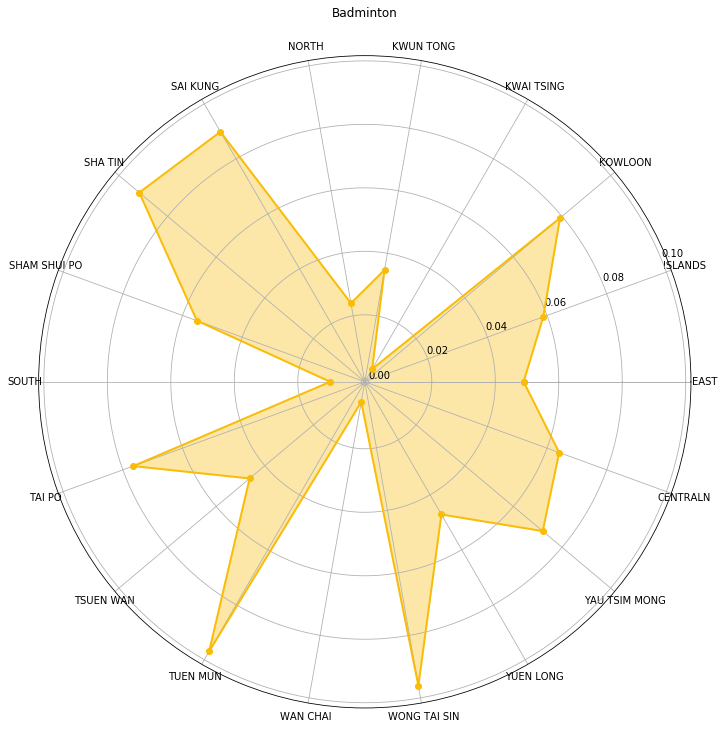

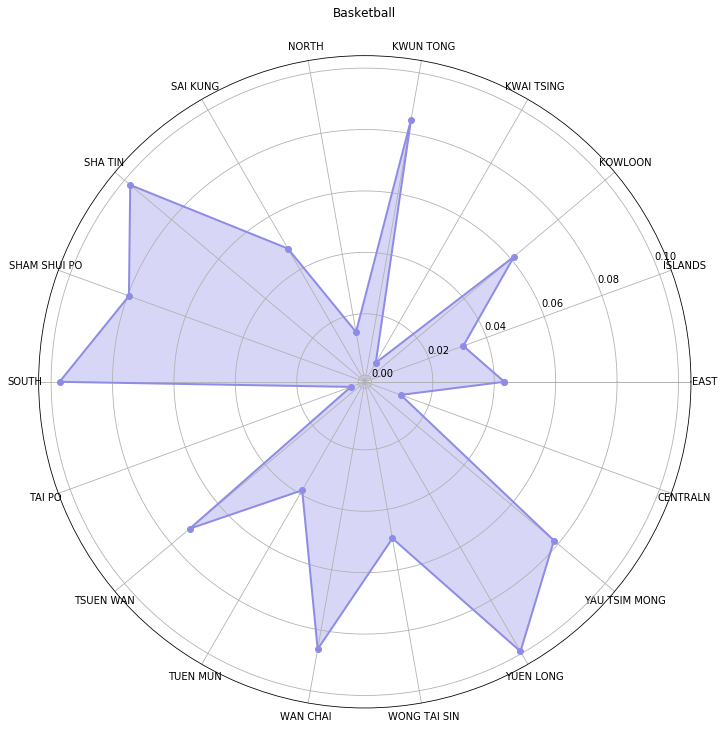

In [ ]:
for i in range(7):
    stats=df.iloc[i,1:-1].values
    title=df.iloc[i,0]
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    colors=['#f9bc08','#8f8ce7','#fd4659','#dc4d01','#6ba353','#c4a661','#7bc8f6']
    color=colors[i]
    fig=plt.figure()
    fig.set_size_inches(12, 12)
    ax = fig.add_subplot(111, polar=True)
    lines=ax.plot(angles, stats, 'o-', linewidth=2)
    plt.setp(lines, color=color, linewidth=2.0)
    ax.fill(angles, stats, color,alpha=0.35)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.title.set_text(title)
    ax.grid(True)
    plt.savefig(title+'.png')